# Predicting Patient Readmission Using Binary Logistic Regression

## Data cleaning and Preprocessing

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve

# Opening the dataset
df=pd.read_csv("C:/Users/AARTHI/Downloads/hospitaldata.csv")


# Drop irrelevant columns
df= df.drop(columns=['encounter_id', 'patient_nbr'])

# Convert 'readmitted' column to binary (1 = Yes, 0 = No)
df['readmitted'] = (df['readmitted'] != 'No').astype(int)

df.info()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_features) #Displays the catogorical features in dataset

df #Displays the binary changed readmitted data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101763 non-null  object
 1   gender                    101763 non-null  object
 2   age                       101763 non-null  object
 3   weight                    101763 non-null  object
 4   discharge_disposition_id  101763 non-null  object
 5   admission_source_id       101763 non-null  object
 6   time_in_hospital          101763 non-null  int64 
 7   medical_specialty         101763 non-null  object
 8   num_lab_procedures        101763 non-null  int64 
 9   num_procedures            101763 non-null  int64 
 10  num_medications           101763 non-null  int64 
 11  number_outpatient         101763 non-null  int64 
 12  number_emergency          101763 non-null  int64 
 13  number_inpatient          101763 non-null  int64 
 14  diag

,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Unknown,_Other,Referral,1,Other,41,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),Unknown,Home,Emergency,3,Other,59,0,...,No,No,Up,No,No,No,No,Yes,Yes,1
2,AfricanAmerican,Female,[20-30),Unknown,Home,Emergency,2,Other,11,5,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),Unknown,Home,Emergency,2,Other,44,1,...,No,No,Up,No,No,No,No,Yes,Yes,0
4,Caucasian,Male,[40-50),Unknown,Home,Emergency,1,Other,51,0,...,No,No,Steady,No,No,No,No,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,AfricanAmerican,Male,[70-80),Unknown,_Other,Emergency,3,Other,51,0,...,No,No,Down,No,No,No,No,Yes,Yes,1
101759,AfricanAmerican,Female,[80-90),Unknown,_Other,Other,5,Other,33,3,...,No,No,Steady,No,No,No,No,No,Yes,0
101760,Caucasian,Male,[70-80),Unknown,Home,Emergency,1,Other,53,0,...,No,No,Down,No,No,No,No,Yes,Yes,0
101761,Caucasian,Female,[80-90),Unknown,_Other,Emergency,10,Other,45,2,...,No,No,Up,No,No,No,No,Yes,Yes,0


## Encoding the catogorical values using label encoders

In [5]:

label_mappings = {}

# Encode categorical columns 
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Apply label encoding
    label_mappings[col] = {idx: category for idx, category in enumerate(le.classes_)}  

for col, mapping in label_mappings.items():
    print(f"\nLabel Encoding for {col}:")
    for encoded_value, category in mapping.items():
        print(f"  {encoded_value} -> {category}")



Label Encoding for race:
  0 ->  Unknown
  1 -> AfricanAmerican
  2 -> Asian
  3 -> Caucasian
  4 -> Hispanic
  5 -> Other

Label Encoding for gender:
  0 -> Female
  1 -> Male

Label Encoding for age:
  0 -> [0-10)
  1 -> [10-20)
  2 -> [20-30)
  3 -> [30-40)
  4 -> [40-50)
  5 -> [50-60)
  6 -> [60-70)
  7 -> [70-80)
  8 -> [80-90)
  9 -> [90-100)

Label Encoding for weight:
  0 ->  Unknown
  1 -> >200
  2 -> [0-25)
  3 -> [100-125)
  4 -> [125-150)
  5 -> [150-175)
  6 -> [175-200)
  7 -> [25-50)
  8 -> [50-75)
  9 -> [75-100)

Label Encoding for discharge_disposition_id:
  0 -> Home
  1 -> _Other

Label Encoding for admission_source_id:
  0 ->  Other
  1 -> Emergency
  2 -> Referral

Label Encoding for medical_specialty:
  0 ->  Other
  1 -> Cardiology
  2 -> Emergency/Trauma
  3 -> Family/GeneralPractice
  4 -> InternalMedicine

Label Encoding for diag_1:
  0 -> 10
  1 -> 11
  2 -> 110
  3 -> 112
  4 -> 114
  5 -> 115
  6 -> 117
  7 -> 131
  8 -> 133
  9 -> 135
  10 -> 136
  11 -

## Getting the fully encoded data set

In [7]:
print("The fully encoded dataset is")
df

The fully encoded dataset is


,race,gender,age,weight,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_pioglitazone,change,diabetesMed,readmitted
0,3,0,0,0,1,2,1,0,41,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,0,1,3,0,59,0,...,0,0,3,0,0,0,0,1,1,1
2,1,0,2,0,0,1,2,0,11,5,...,0,0,0,0,0,0,0,0,1,0
3,3,1,3,0,0,1,2,0,44,1,...,0,0,3,0,0,0,0,1,1,0
4,3,1,4,0,0,1,1,0,51,0,...,0,0,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,1,1,7,0,1,1,3,0,51,0,...,0,0,1,0,0,0,0,1,1,1
101759,1,0,8,0,1,0,5,0,33,3,...,0,0,2,0,0,0,0,0,1,0
101760,3,1,7,0,0,1,1,0,53,0,...,0,0,1,0,0,0,0,1,1,0
101761,3,0,8,0,1,1,10,0,45,2,...,0,0,3,0,0,0,0,1,1,0


## Data spliting and training

In [9]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['readmitted'])
y = df['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 80% training   20% testing by using train_test_split

print("x_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (81410, 44)
y_train shape: (81410,)
x_test shape: (20353, 44)
y_test shape: (20353,)


### Binary logistic regression model

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='liblinear',class_weight='balanced')
model.fit(X_train, y_train)

model


# here using the solver 'liblinear' is used for small - medium datasets

LogisticRegression(class_weight='balanced', max_iter=5000, solver='liblinear')

## Evaluation of the model
### Performance metrics

In [13]:
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Printing performance metrics
print("Accuracy:",accuracy)
print("Classification Report:\n", classification_rep)
print("ROC-AUC Score:",roc_auc)

Accuracy: 0.6212351987422001
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     10972
           1       0.60      0.52      0.56      9381

    accuracy                           0.62     20353
   macro avg       0.62      0.61      0.61     20353
weighted avg       0.62      0.62      0.62     20353

ROC-AUC Score: 0.6600994466713014


## Graphical analysis

### Patient readmission graph

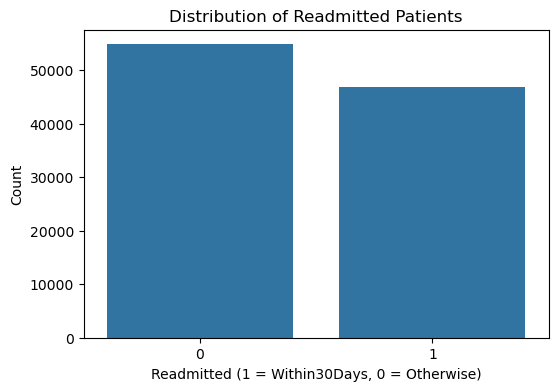

In [16]:
# Distribution of target variable 'readmitted'
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmitted Patients')
plt.xlabel('Readmitted (1 = Within30Days, 0 = Otherwise)')
plt.ylabel('Count')
plt.show()


### ROC Curve

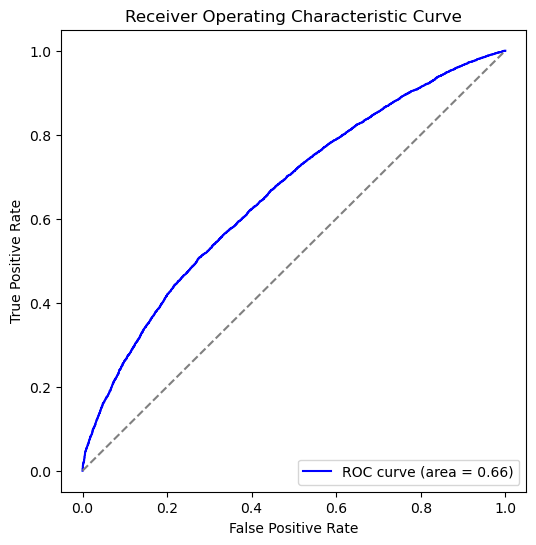

In [18]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()



### Confusion Matrix

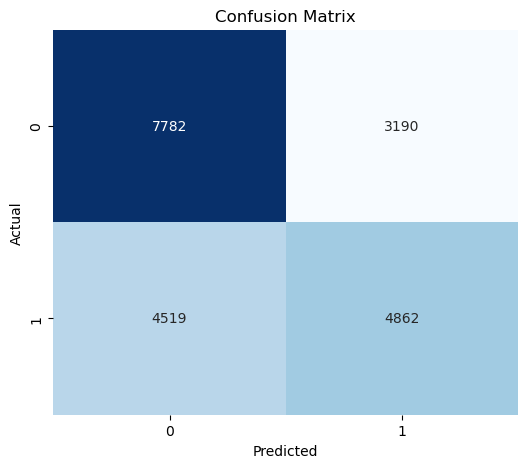

The confusion_matrix is


array([[7782, 3190],
       [4519, 4862]], dtype=int64)

In [20]:
# Confusion Matrix = cm
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(f'The confusion_matrix is')
cm

### Feature importance chart

C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\1667960637.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_r')


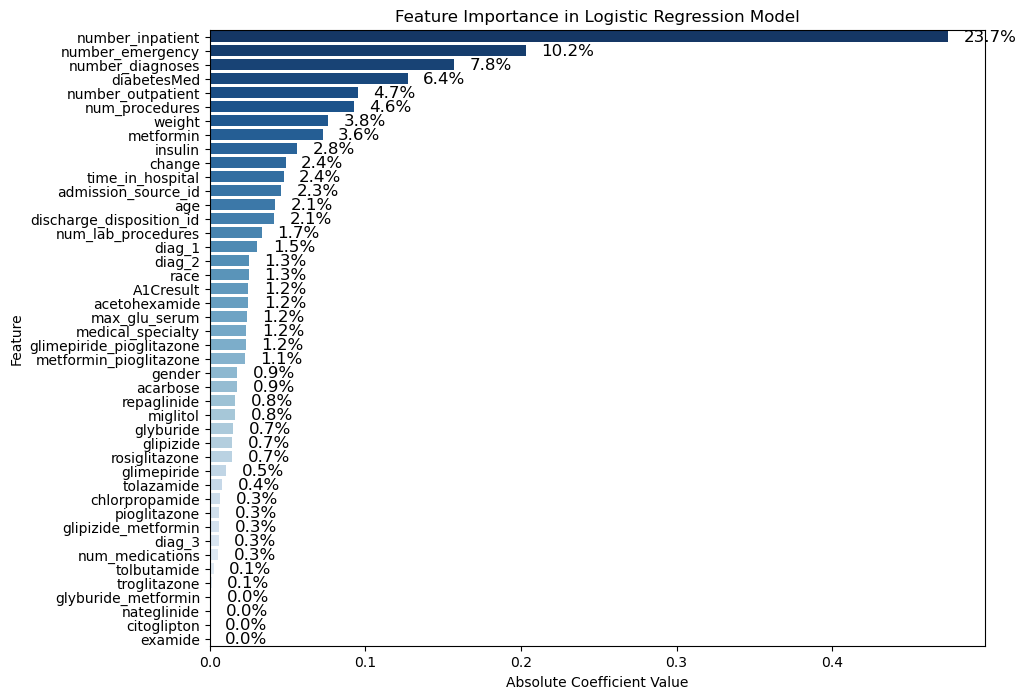

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the importance value for each features (absolute coefficient values)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_[0])})

# Convert importance values to percentages
feature_importance['Percentage'] = (feature_importance['Importance'] / feature_importance['Importance'].sum()) * 100

# Sort by large to small
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance 
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='Blues_r')
for index, value in enumerate(feature_importance['Importance']):
    percentage = f"{feature_importance['Percentage'].iloc[index]:.1f}%"
    ax.text(value + 0.01, index, percentage, ha='left', va='center', fontsize=12, color='black')

plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()



### Plotting the Correlation Heatmap

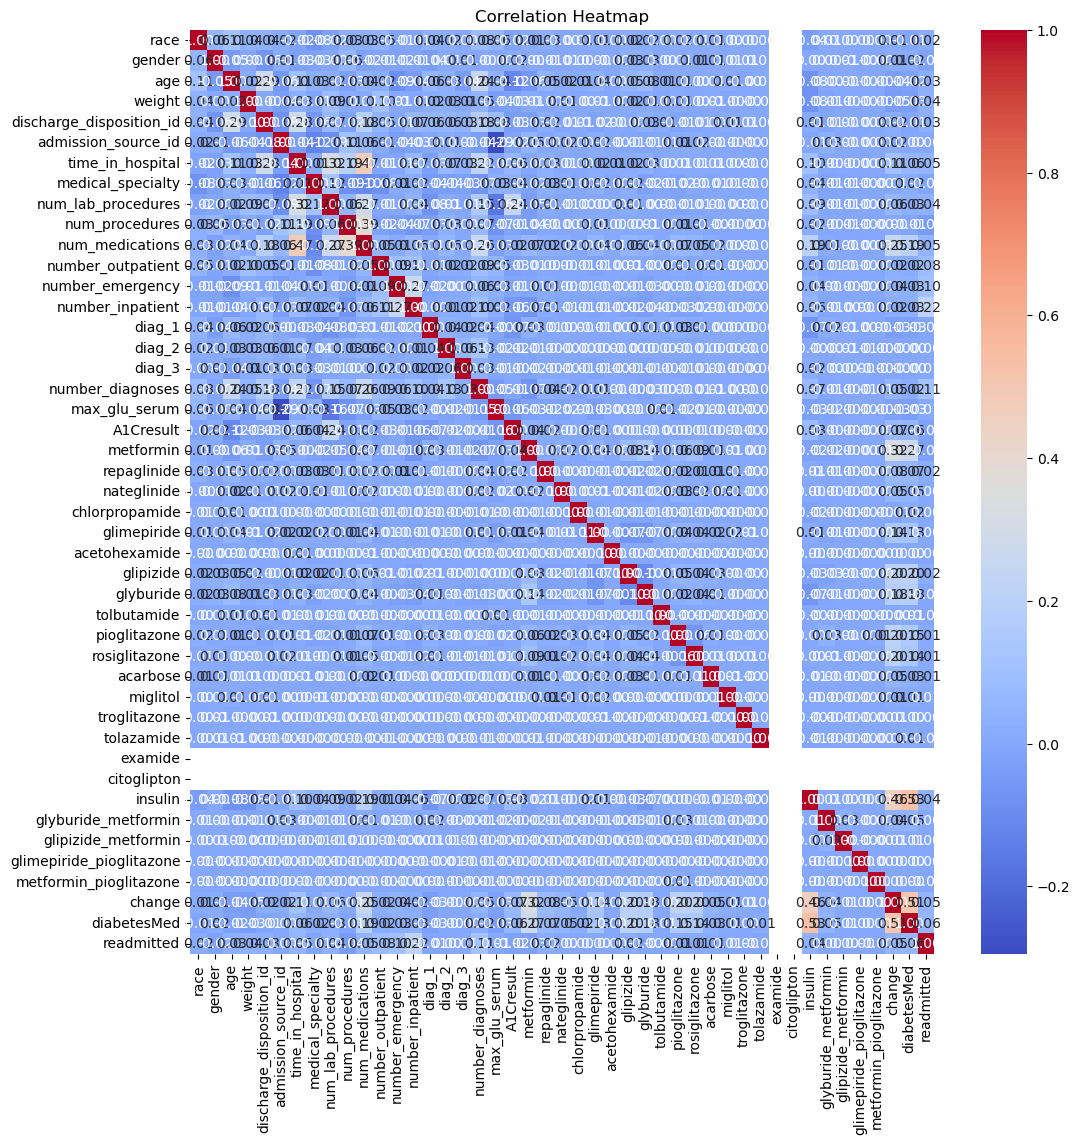

In [24]:
# Correlation Heatmap 
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

### Plotting the ratio of correct and incorrect predictions from result

C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\329944909.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Correct Predictions', 'Incorrect Predictions'],


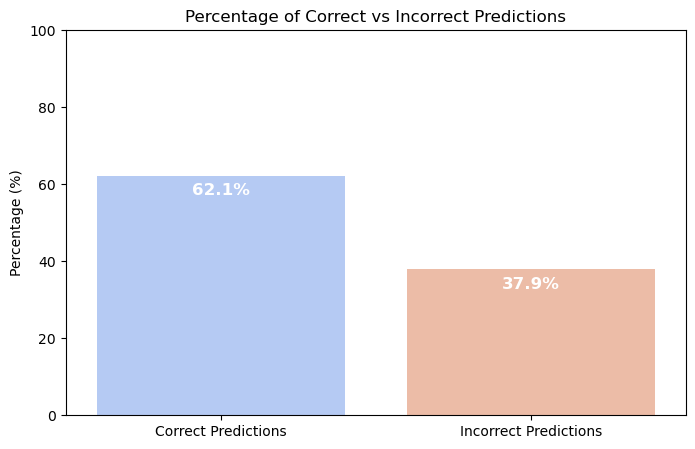

In [26]:
import numpy as np


# Identify correct and incorrect predictions
correct_predictions = y_test == y_pred  # If the predicted value is equal to testing set
incorrect_predictions = y_test != y_pred # If the predicted value is not equal to testing set

# convert the correct and incorrect predictions into %
correct_percentage = correct_predictions.mean() * 100
incorrect_percentage = incorrect_predictions.mean() * 100

# Create a bar chart with the calculated percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=['Correct Predictions', 'Incorrect Predictions'], 
                 y=[correct_percentage, incorrect_percentage], 
                 palette='coolwarm')

for i, value in enumerate([correct_percentage, incorrect_percentage]):
    ax.text(i, value - 5, f"{value:.1f}%", ha='center', fontsize=12, color='white', fontweight='bold')

plt.title('Percentage of Correct vs Incorrect Predictions')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100) 
plt.show()


### Ploting the relation of each features with readmission individually

C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\1844060508.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\1844060508.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\1844060508.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\AARTHI\AppData\Local\Temp\ipykernel_14640\1844060508.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

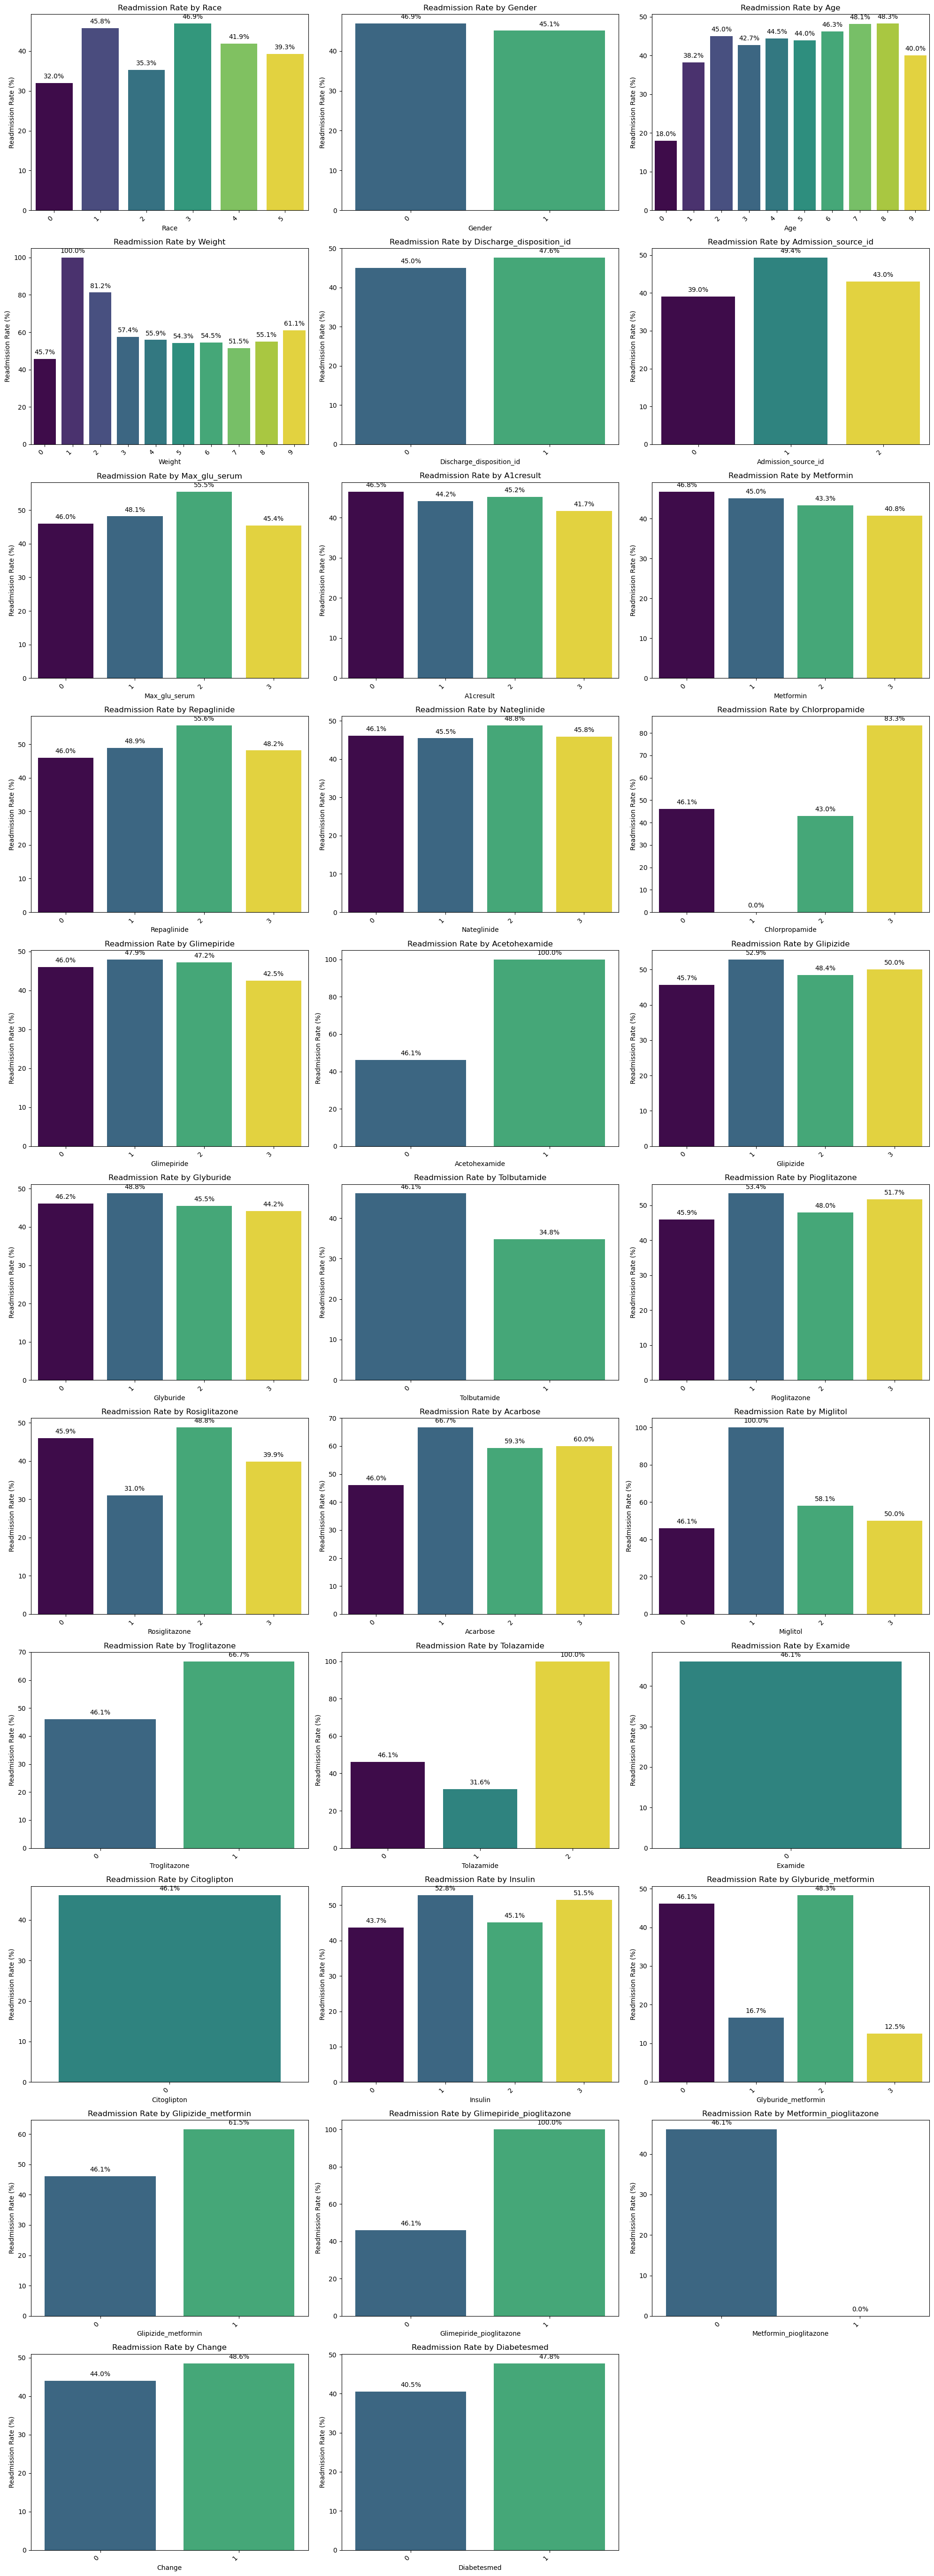

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define categorical features which we want to co-relate
categorical_features = ['race', 'gender', 'age', 'weight', 'discharge_disposition_id', 
                        'admission_source_id', 'max_glu_serum', 
                        'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                        'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
                        'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
                        'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone', 
                        'metformin_pioglitazone', 'change', 'diabetesMed']


num_cols = 3 
num_rows = math.ceil(len(categorical_features) / num_cols) 

# Set figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()  

# Create plots for each features
for i, feature in enumerate(categorical_features):
    
    feature_data = df.groupby(feature)['readmitted'].mean() * 100  # Convert to percentage

    # Create bar plot
    sns.barplot(x=feature_data.index, y=feature_data.values, hue=feature_data.index, palette='viridis', legend=False, ax=axes[i])
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.1f}%", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')

    # Titles and labels
    axes[i].set_title(f"Readmission Rate by {feature.capitalize()}")
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel("Readmission Rate (%)")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
  
# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Plotting the relationship by groups for better understanding

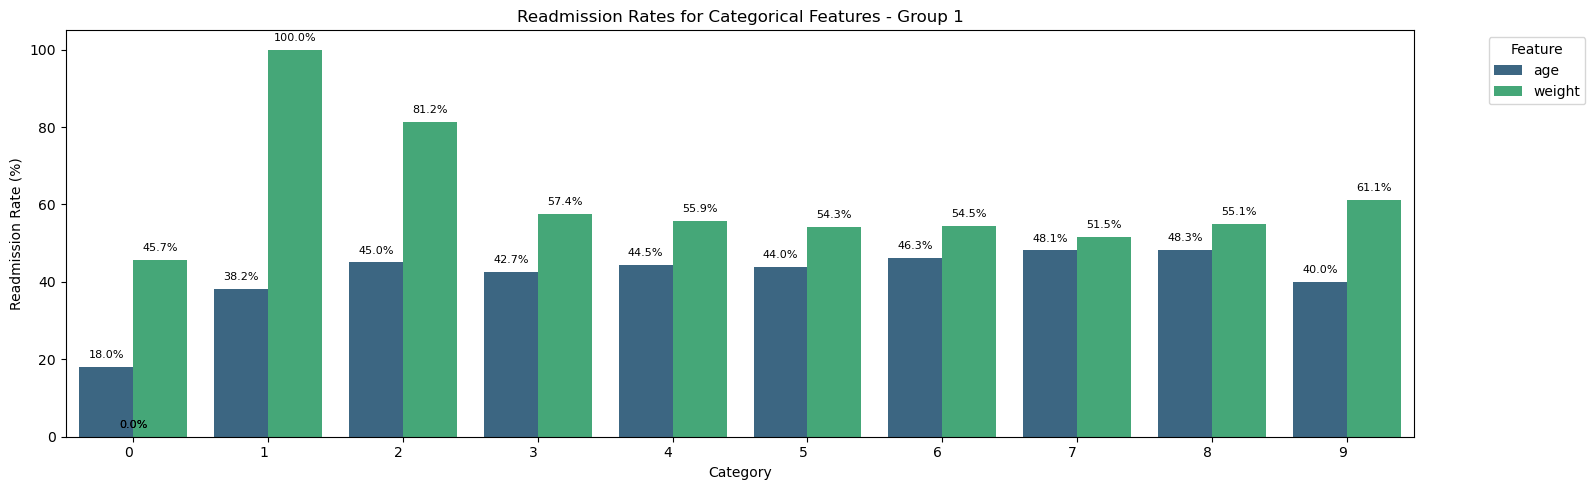

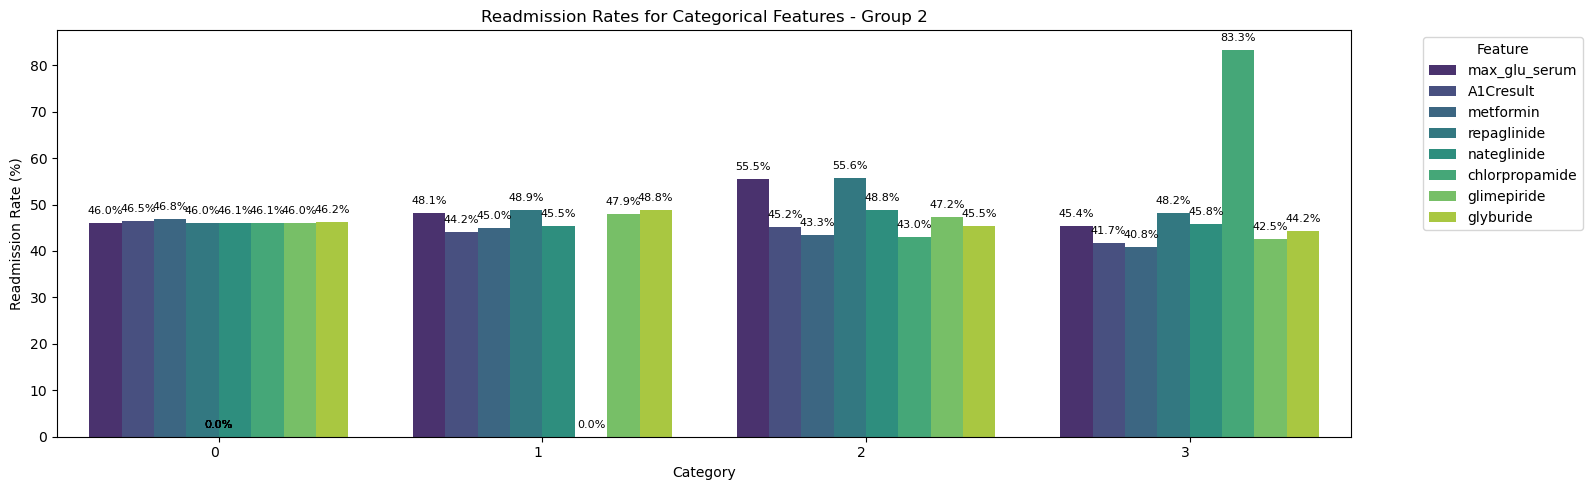

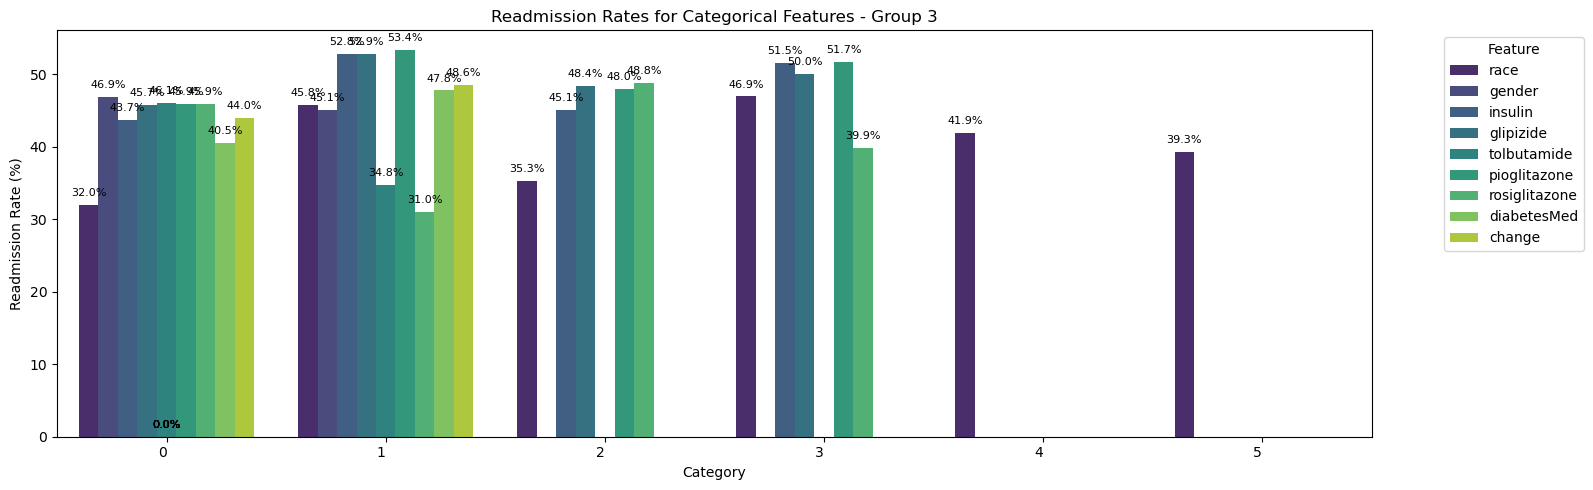

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define categorical features (split into 3 groups)
categorical_groups = [
    ['age', 'weight'],
    ['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride','glyburide'],
    ['race', 'gender', 'insulin',  'glipizide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'diabetesMed', 'change']
]

# create 3 separate plots
for idx, group in enumerate(categorical_groups):
    readmission_rates = []

    # Compute readmission rates 
    for feature in group:
        feature_data = df.groupby(feature)['readmitted'].mean() * 100  
        for category, rate in feature_data.items():
            readmission_rates.append({'Feature': feature, 'Category': category, 'Readmission Rate': rate})

    # Convert to single data
    readmission_df = pd.DataFrame(readmission_rates)

    # Create plot
    plt.figure(figsize=(16, 5))
    ax = sns.barplot(data=readmission_df, x='Category', y='Readmission Rate', hue='Feature', palette='viridis')
    plt.xticks(rotation=0, ha='right')

    
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.ylabel("Readmission Rate (%)")
    plt.title(f"Readmission Rates for Categorical Features - Group {idx+1}")
    plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
